In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [5]:
print(tf.__version__)

2.15.0


In [6]:
fashion_mnist = keras.datasets.fashion_mnist

In [52]:
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [8]:
class_names = ['T-shirt/top','Trouser', 'Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [53]:
train_images.shape

(60000, 28, 28)

In [54]:
len(train_labels)

60000

In [55]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [56]:
test_images.shape

(10000, 28, 28)

In [57]:
len(test_labels)

10000

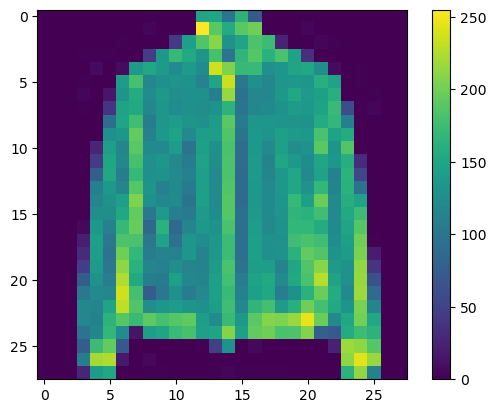

In [58]:
plt.figure()
plt.imshow(train_images[68])
plt.colorbar()
plt.grid(False)
plt.show()

In [59]:
train_images = train_images / 255
test_images = test_images / 255

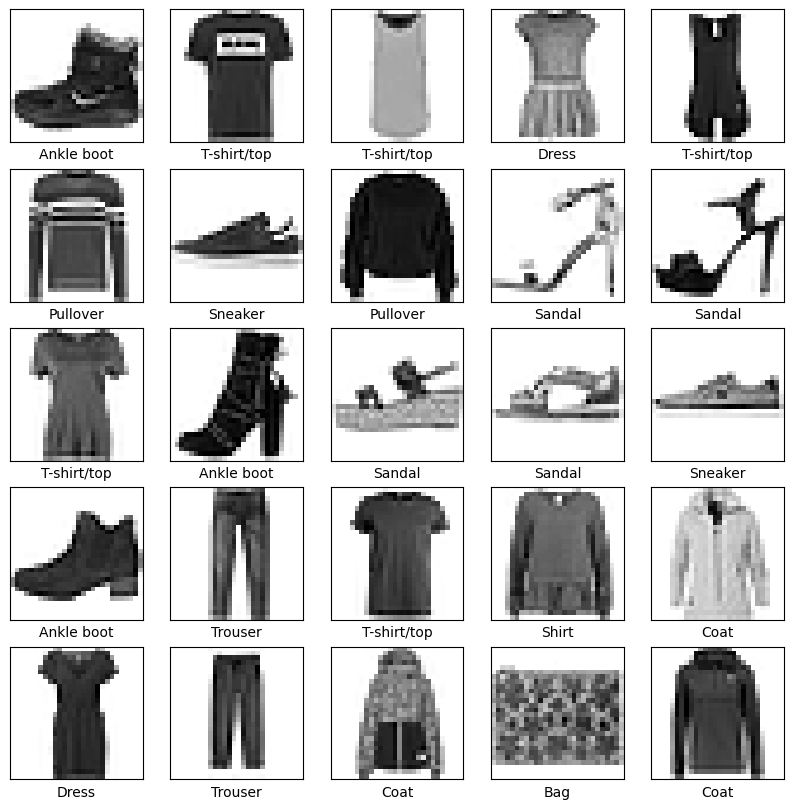

In [60]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [61]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation = 'relu'),
    keras.layers.Dense(10,activation = 'softmax')
])

In [62]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [63]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4935 - accuracy: 0.8252
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3725 - accuracy: 0.8649
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3353 - accuracy: 0.8789
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3103 - accuracy: 0.8874
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2928 - accuracy: 0.8922
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2805 - accuracy: 0.8968
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2653 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2573 - accuracy: 0.9046
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2485 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.237

In [64]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

print("\nTest accuracy:", test_acc)

313/313 - 1s - loss: 0.3377 - accuracy: 0.8806 - 1s/epoch - 4ms/step

Test accuracy: 0.8805999755859375


In [46]:
len(test_labels)

10000

In [47]:
test_images.shape

(60000, 28, 28)

In [65]:
predictions = model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [66]:
predictions[0]

array([1.9098736e-07, 7.9263415e-08, 2.2244614e-10, 1.4778317e-09,
       2.2459192e-09, 1.6358949e-03, 5.3156299e-08, 7.2187921e-03,
       7.9149807e-08, 9.9114484e-01], dtype=float32)

In [67]:
np.argmax(predictions[0])

9

In [42]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

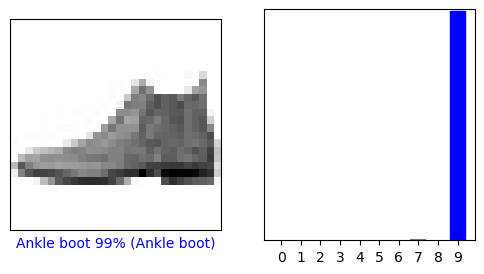

In [69]:
i =0 
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i,predictions[i],test_labels)
plt.show()

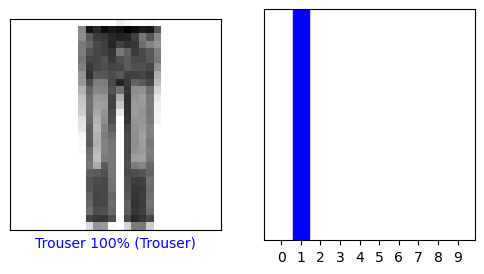

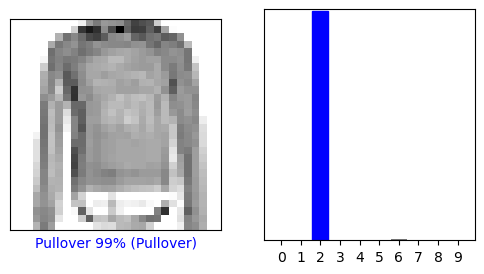

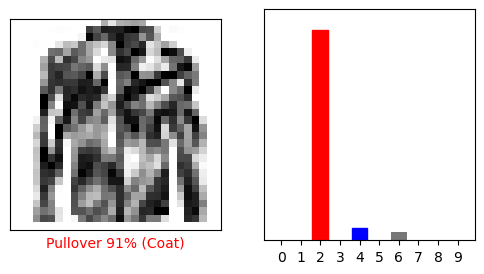

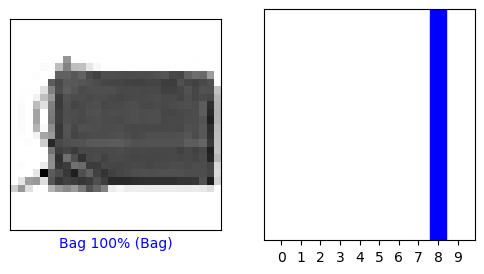

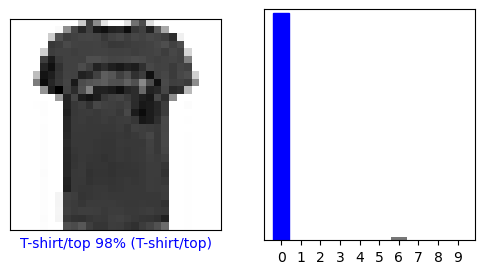

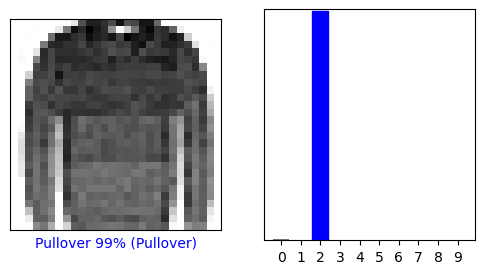

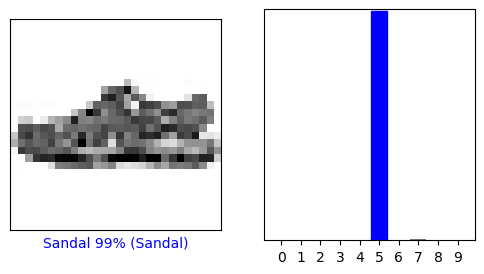

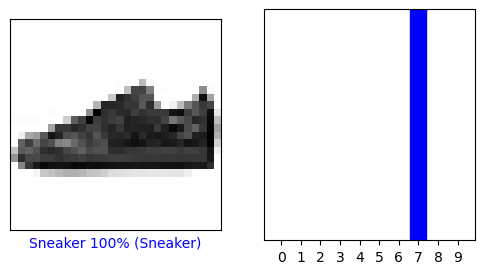

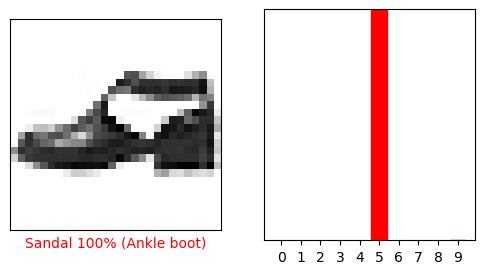

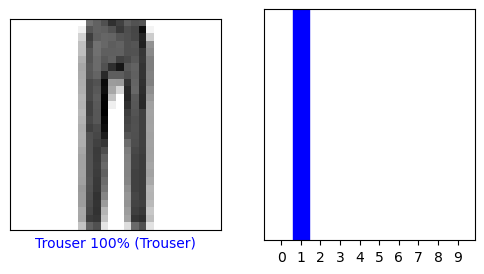

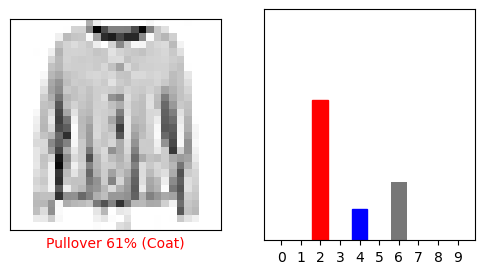

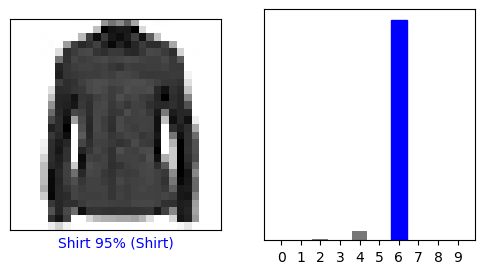

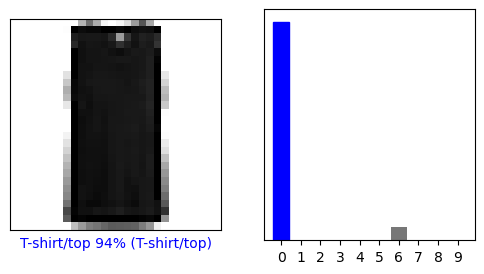

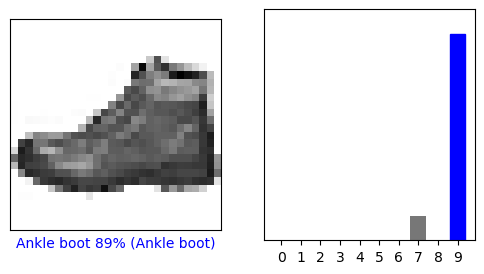

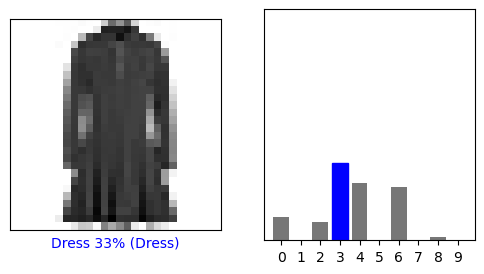

In [72]:
for i in range(15,30):
    plt.figure(figsize=(6,3))
    plt.subplot(1,2,1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(1,2,2)
    plot_value_array(i,predictions[i],test_labels)
plt.show()

In [2]:
from PIL import Image

# Abre la imagen
imagen = Image.open("Tenedor1.jpeg")

# Mostrar información sobre la imagen
print("Formato:", imagen.format)
print("Tamaño de la imagen:", imagen.size)
print("Modo de la imagen:", imagen.mode)

# Mostrar la imagen
imagen.show()

Formato: JPEG
Tamaño de la imagen: (900, 1600)
Modo de la imagen: RGB


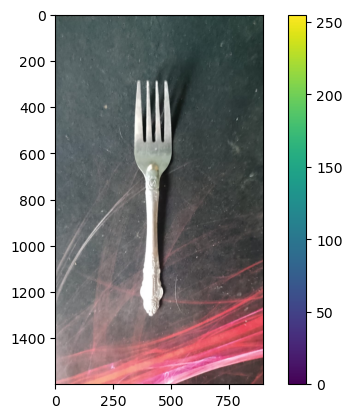

In [5]:
plt.figure()
plt.imshow(imagen)
plt.colorbar()
plt.grid(False)
plt.show()

In [9]:
imagen_array = np.array(imagen)
imagen_redimensionada = np.reshape(imagen_array, (8, 8, -1))

In [46]:
from PIL import Image

# Cargar la imagen original
imagen_original = Image.open("Tenedor1.jpeg")

# Redimensionar la imagen a 8x8
imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)

# Guardar la imagen redimensionada
# imagen_redimensionada.save("imagen_redimensionada.jpg")

# Mostrar información sobre la imagen redimensionada
# print("Formato:", imagen_redimensionada.format)
imagen_bn = imagen_redimensionada.convert("L")
print("Tamaño de la imagen:", imagen_redimensionada.size)

# Mostrar la imagen redimensionada
# imagen_redimensionada.show()

Tamaño de la imagen: (28, 28)


C:\Users\josue\AppData\Local\Temp\ipykernel_7636\3665622908.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)


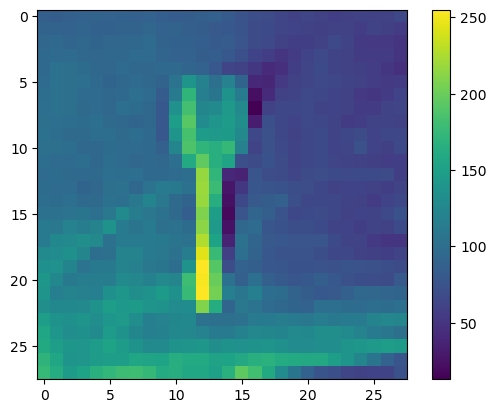

In [47]:
plt.figure()
plt.imshow(imagen_bn)
plt.colorbar()
plt.grid(False)
plt.show()

C:\Users\josue\AppData\Local\Temp\ipykernel_12028\2019278191.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)


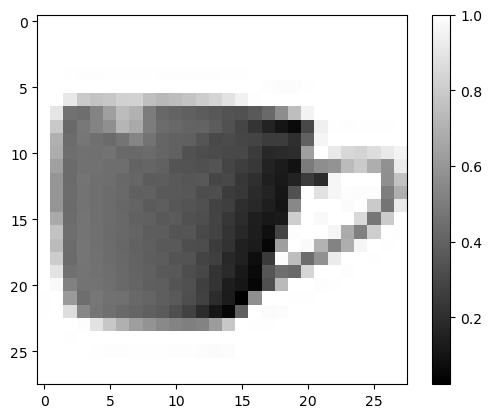

In [2]:
from PIL import Image

# Cargar la imagen original
imagen_original = Image.open("Tasa2.png")
imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)
imagen_bn = imagen_redimensionada.convert("L")

# Normalizar la imagen
imagen_np = np.array(imagen_bn) / 255.0

# Mostrar la imagen normalizada
plt.figure()
plt.imshow(imagen_np, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

C:\Users\josue\AppData\Local\Temp\ipykernel_7636\1777463798.py:5: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)


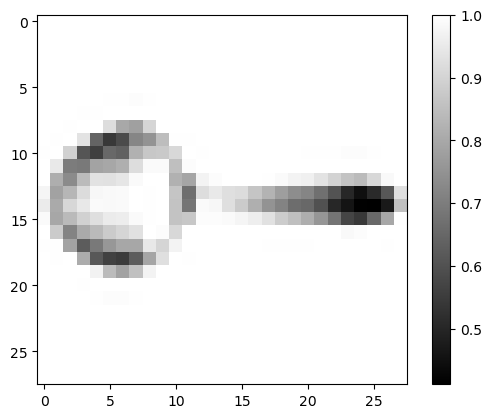

In [61]:
from PIL import Image

# Cargar la imagen original
imagen_original = Image.open("Cuchara11.png")
imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)
imagen_bn = imagen_redimensionada.convert("L")

# Normalizar la imagen
imagen_np = np.array(imagen_bn) / 255.0

# Mostrar la imagen normalizada
plt.figure()
plt.imshow(imagen_np, cmap='gray')
plt.colorbar()
plt.grid(False)
plt.show()

In [44]:
from PIL import Image

# Cargar la imagen original
imagen_original = Image.open("Tenedor1.jpeg")

# Redimensionar la imagen a 28x28 píxeles
imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)

# Normalizar los valores de los píxeles
imagen_array = (np.array(imagen_redimensionada) / 255.0).astype('float32')

# Mostrar información sobre la imagen redimensionada
print("Formato:", imagen_redimensionada.format)
print("Tamaño de la imagen:", imagen_redimensionada.size)

# Mostrar la imagen redimensionada
imagen_redimensionada.show()

C:\Users\josue\AppData\Local\Temp\ipykernel_7636\2911396073.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)


Formato: None
Tamaño de la imagen: (28, 28)


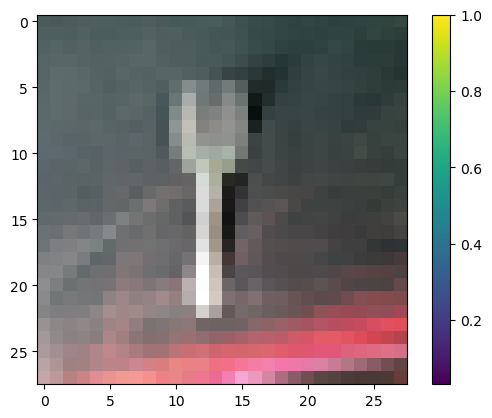

In [45]:
plt.figure()
plt.imshow(imagen_array)
plt.colorbar()
plt.grid(False)
plt.show()

In [38]:
imagen_bn.size

(28, 28)

In [40]:
imagen_bn_array = np.array(imagen_bn)

# Normalizar los valores dividiendo por 255
imagen_bn_normalizada = imagen_bn_array / 255.0

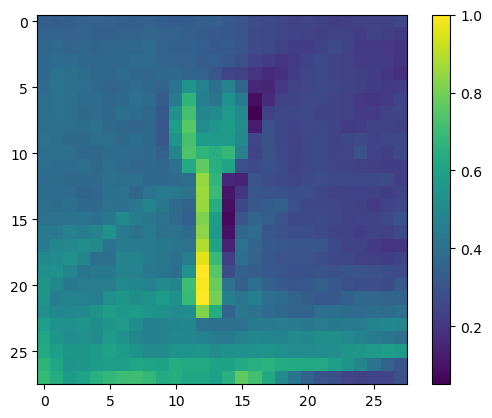

In [41]:
plt.figure()
plt.imshow(imagen_bn_normalizada)
plt.colorbar()
plt.grid(False)
plt.show()

In [50]:
from PIL import Image

# Cargar la imagen original
imagen_original = Image.open("Cuchara1.png")

# Redimensionar la imagen a 8x8
imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)

# Guardar la imagen redimensionada
# imagen_redimensionada.save("imagen_redimensionada.jpg")

# Mostrar información sobre la imagen redimensionada
# print("Formato:", imagen_redimensionada.format)
print("Tamaño de la imagen:", imagen_redimensionada.size)

Tamaño de la imagen: (28, 28)


C:\Users\josue\AppData\Local\Temp\ipykernel_7636\2473783703.py:7: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)


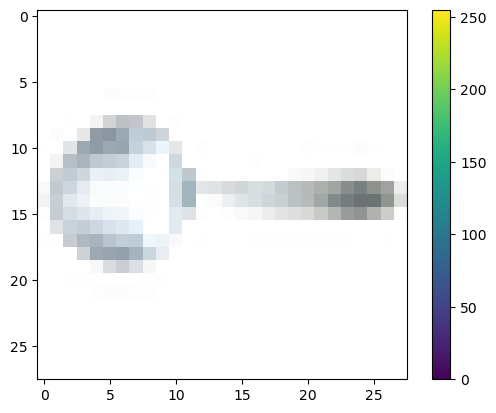

In [51]:
plt.figure()
plt.imshow(imagen_redimensionada)
plt.colorbar()
plt.grid(False)
plt.show()

In [33]:
imagen_redimensionada = imagen_redimensionada / 255
# test_images = test_images / 255

TypeError: unsupported operand type(s) for /: 'Image' and 'int'

In [27]:
import numpy as np
from PIL import Image

# Cargar la imagen original
imagen_original = Image.open("Tenedor1.jpeg")

# Escalar la imagen a un tamaño apropiado
imagen_escala = imagen_original.resize((28, 28), Image.ANTIALIAS)

# Convertir la imagen a un array NumPy
imagen_array = np.array(imagen_escala)

# Si la imagen tiene 3 canales (RGB), puedes redimensionarla así
imagen_redimensionada = np.repeat(np.repeat(imagen_array, 28, axis=0), 8, axis=1)

# Si la imagen es en escala de grises (solo 1 canal), entonces simplemente repetimos el canal
# imagen_redimensionada = np.repeat(np.repeat(imagen_array[:, :, np.newaxis], 8, axis=0), 8, axis=1)

# Convertir la matriz redimensionada nuevamente a una imagen PIL
imagen_redimensionada = Image.fromarray(imagen_redimensionada.astype('uint8'))

# Guardar la imagen redimensionada
# imagen_redimensionada.save("imagen_redimensionada.jpg")

# Mostrar información sobre la imagen redimensionada
print("Formato:", imagen_redimensionada.format)
print("Tamaño de la imagen:", imagen_redimensionada.size)

# Mostrar la imagen redimensionada
# imagen_redimensionada.show()


C:\Users\josue\AppData\Local\Temp\ipykernel_7636\1287253192.py:8: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imagen_escala = imagen_original.resize((28, 28), Image.ANTIALIAS)


Formato: None
Tamaño de la imagen: (224, 784)


In [38]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Lista de nombres de archivo de las imágenes
nombres_archivos = ["Tasa1.png", "Tasa2.png", "Tasa3.png", "Tasa4.png", "Tasa5.png",
                    "Tasa6.png", "Tasa7.png", "Tasa8.png", "Tasa9.png", "Tasa0.png",
                    "Cuchillo1.png", "Cuchillo2.png", "Cuchillo3.png", "Cuchillo4.png", "Cuchillo5.png",
                    "Cuchillo6.png", "Cuchillo7.png", "Cuchillo3.png", "Cuchillo6.png", "Cuchillo1.png",
                    "Vaso0.png", "Vaso1.png", "Vaso2.png", "Vaso3.png", "Vaso4.png",
                    "Vaso5.png", "Vaso6.png", "Vaso7.png", "Vaso8.png", "Vaso2.png"]

# Lista para almacenar las imágenes normalizadas
imagenes_normalizadas = []

# Iterar sobre los nombres de archivo y procesar las imágenes
for nombre_archivo in nombres_archivos[:30]:  # Iterar sobre las primeras 10 imágenes
    # Cargar la imagen original
    imagen_original = Image.open(nombre_archivo)
    imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)
    imagen_bn = imagen_redimensionada.convert("L")

    # Normalizar la imagen
    imagen_np = np.array(imagen_bn) / 255.0

    # Agregar la imagen normalizada a la lista
    imagenes_normalizadas.append(imagen_np)

# Mostrar las imágenes normalizadas
# for imagen_np in imagenes_normalizadas:
#     plt.figure()
#     plt.imshow(imagen_np, cmap='gray')
#     plt.colorbar()
#     plt.grid(False)
#     plt.show()

# plt.figure(figsize=(10, 10))
# for i in range(30):
#     plt.subplot(5, 6, i+1)
#     plt.imshow(imagenes_normalizadas[i], cmap='gray')  # Muestra cada imagen normalizada de la lista
#     plt.xticks([])
#     plt.yticks([])
#     plt.grid(False)
# plt.show()


C:\Users\josue\AppData\Local\Temp\ipykernel_12028\2634994671.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)


In [39]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

nombres_archivos = ["Cuchillo1.png", "Cuchillo2.png", "Cuchillo3.png", "Cuchillo4.png", "Cuchillo5.png",
                    "Cuchillo6.png", "Cuchillo7.png", "Cuchillo3.png", "Cuchillo6.png", "Cuchillo1.png"]
                

for nombre_archivo in nombres_archivos:
    imagen_original = Image.open(nombre_archivo)
    imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)
    imagen_bn = imagen_redimensionada.convert("L")

    imagen_np = np.array(imagen_bn) / 255.0
    etiqueta = "Cuchillo"
    imagenes_normalizadas.append((imagen_np,etiqueta))

C:\Users\josue\AppData\Local\Temp\ipykernel_12028\1584043655.py:17: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)


C:\Users\josue\AppData\Local\Temp\ipykernel_12028\3309046343.py:16: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)


ValueError: num must be an integer with 1 <= num <= 30, not 31

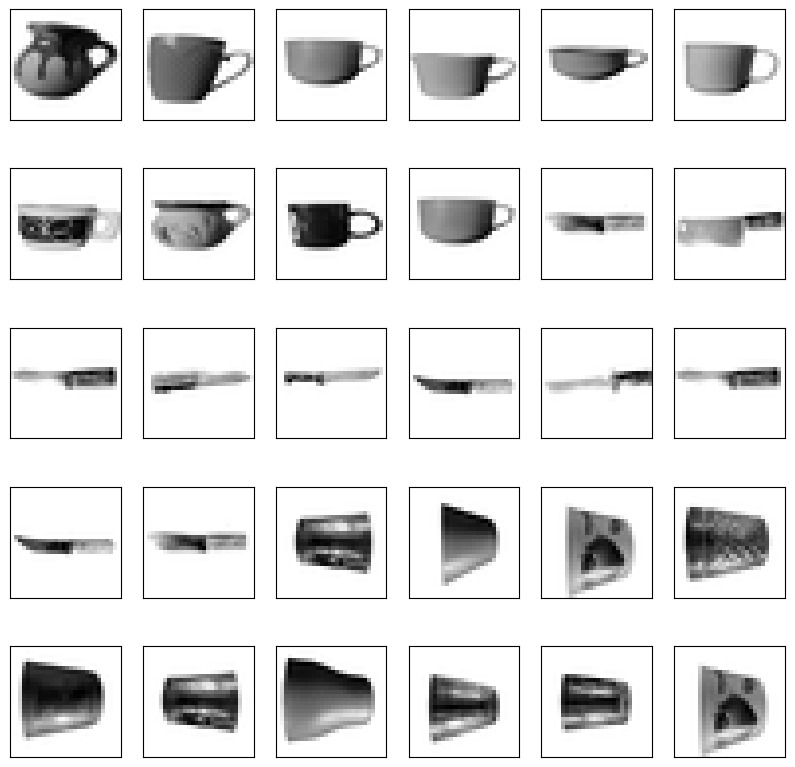

In [41]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Lista de nombres de archivo de las imágenes
nombres_archivos = ["Vaso0.png", "Vaso1.png", "Vaso2.png", "Vaso3.png", "Vaso4.png",
                    "Vaso5.png", "Vaso6.png", "Vaso7.png", "Vaso8.png", "Vaso2.png"]

# Lista para almacenar las imágenes normalizadas
# imagenes_normalizadas = []

# Iterar sobre los nombres de archivo y procesar las imágenes
for nombre_archivo in nombres_archivos[:10]:  # Iterar sobre las primeras 10 imágenes
    # Cargar la imagen original
    imagen_original = Image.open(nombre_archivo)
    imagen_redimensionada = imagen_original.resize((28, 28), Image.ANTIALIAS)
    imagen_bn = imagen_redimensionada.convert("L")

    # Normalizar la imagen
    imagen_np = np.array(imagen_bn) / 255.0
    etiqueta = "Vaso"
    imagenes_normalizadas.append((imagen_np,"Vaso"))




plt.figure(figsize=(10, 10))
for i, (imagen_np, etiqueta) in enumerate(imagenes_normalizadas):
    plt.subplot(5, 6, i+1)
    plt.imshow(imagen_np, cmap='gray')  # Muestra cada imagen normalizada de la lista
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
plt.show()
